In [126]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
from sympy import *

<b>Домашнее задание: оптимизировать x^2*(np.sin(0,5*_x)^2+1)</b>
<ul>
<li>При каких значениях alpha оптимизация проходит успешно, а при каких "застревает"?</li></ul>

In [128]:
# f(x)
x=Symbol('x')
f=x**2*(sin(0.5*x)**2+1)
f

In [129]:
# призводная f(x)
diff(f,x)

In [130]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad1(_x): return (_x**2)*np.sin(0.5*_x)*np.cos(0.5*_x)+2*_x*(np.sin(0.5*_x)**2+1)

In [131]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [133]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad -189.18221395170536
method1 -184.72924952159246
method2 -189.17549840949732


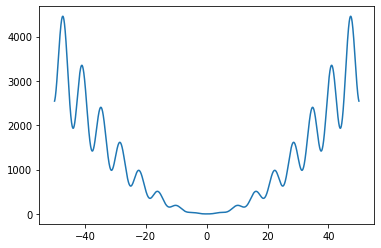

In [134]:
plt.plot(x, func1(x))
plt.show()

In [135]:
x0=np.random.uniform(-50, 50)
alpha=0.09
n_iter=0
accuracy=0.01
#for x in range(n_iter):
while (func1(x0)>accuracy) and (n_iter<10000):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)
    n_iter+=1

-38.193826743662164 1546.2185726303999
0.2599797708176794 0.0687251474616376
0.21161526253704044 0.04528048619486227
0.17267640859891903 0.030038855848983238
0.14113299533325385 0.020017544726364307
0.11547668108499894 0.013379269145272502


In [137]:
class optimizer:
    def __init__(self, alpha, n_iters=10000,  accuracy=0.01):
        self.alpha=alpha
        self.n_iters=n_iters
        self.accuracy=accuracy
    def fit(self, func, grad, x0, accuracy):
        n_iter=0
        while (func1(x0)>accuracy) and (n_iter<self.n_iters):
            x0-=self.alpha*grad(x0)
            n_iter+=1
        return x0
opt1=optimizer(alpha, 1000, 0.01)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50), 0.01)
print(x, func1(x))

-0.08944800813997894 0.008016939277468011


При alpha>0.15 и alpha<0.04 количево "застреваний" увеливичается. Поэтому alpah оптимально в деапазоне [0.04;0.15]